In [7]:
%store -r trainX
%store -r testX
%store -r trainY
%store -r testY
%store -r valX
%store -r valY
%store -r le

In [24]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers, models
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D,Input
from tensorflow.keras.layers import Activation, Dropout,BatchNormalization, Flatten, Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
s=100
batch_size = 40
epochs = 50

In [3]:
model_base = VGG16(input_shape = (s,s,3), include_top = False)

In [4]:
x = Flatten()(model_base.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(4, activation='sigmoid')(x)
model = keras.models.Model(model_base.input, x)
model.compile(optimizer = keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

In [5]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    mode = 'auto',
    min_delta = 0,
    patience = 5,
    verbose = 1,
    restore_best_weights = True
)

In [8]:
vgghist = model.fit(trainX,
                     trainY, 
                     epochs=epochs,
                     callbacks = [early_stopping],
                     validation_data = (valX,valY),
                     batch_size=batch_size,
                     verbose=1
)

Epoch 1/50
34/34 [==============================] - 415s 12s/step - loss: 0.5322 - acc: 0.4616 - val_loss: 0.3991 - val_acc: 0.6726
Epoch 2/50
34/34 [==============================] - 438s 13s/step - loss: 0.4112 - acc: 0.6167 - val_loss: 0.3806 - val_acc: 0.6047
Epoch 3/50
34/34 [==============================] - 440s 13s/step - loss: 0.3319 - acc: 0.7024 - val_loss: 0.2988 - val_acc: 0.7375
Epoch 4/50
34/34 [==============================] - 453s 13s/step - loss: 0.2822 - acc: 0.7644 - val_loss: 0.2292 - val_acc: 0.8142
Epoch 5/50
34/34 [==============================] - 431s 13s/step - loss: 0.2237 - acc: 0.8227 - val_loss: 0.2221 - val_acc: 0.8142
Epoch 6/50
34/34 [==============================] - 451s 13s/step - loss: 0.1811 - acc: 0.8612 - val_loss: 0.1920 - val_acc: 0.8732
Epoch 7/50
34/34 [==============================] - 478s 14s/step - loss: 0.1578 - acc: 0.8877 - val_loss: 0.1986 - val_acc: 0.8437
Epoch 8/50
34/34 [==============================] - 507s 15s/step - loss: 0.

In [10]:
modelLoss, modelAccuracy = model.evaluate(testX, testY, verbose=0)

print('Test Loss is {}'.format(modelLoss))
print('Test Accuracy is {}'.format(modelAccuracy ))



Test Loss is 0.17455542087554932
Test Accuracy is 0.8632075190544128


In [11]:
modelLoss, modelAccuracy = model.evaluate(trainX, trainY, verbose=0)

print('Test Loss is {}'.format(modelLoss))
print('Test Accuracy is {}'.format(modelAccuracy ))


Test Loss is 0.06083052605390549
Test Accuracy is 0.9645494818687439


In [16]:
# classification report on train
predIdxs = model.predict(trainX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(trainY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

              precision    recall  f1-score   support

    Covid-19    0.96552   0.96970   0.96760       231
Lung Opacity    0.99722   0.92051   0.95733       390
      Normal    0.94282   0.99536   0.96837       646
   Pneumonia    1.00000   0.91954   0.95808        87

    accuracy                        0.96455      1354
   macro avg    0.97639   0.95128   0.96285      1354
weighted avg    0.96603   0.96455   0.96440      1354



In [18]:
# classification report on test

predIdxs = model.predict(testX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

              precision    recall  f1-score   support

    Covid-19    0.91525   0.73973   0.81818        73
Lung Opacity    0.87273   0.80000   0.83478       120
      Normal    0.83117   0.94118   0.88276       204
   Pneumonia    1.00000   0.88889   0.94118        27

    accuracy                        0.86321       424
   macro avg    0.90479   0.84245   0.86922       424
weighted avg    0.86816   0.86321   0.86178       424



In [20]:
class_names = ['Covid-19', 'Lung Opacity', 'Normal', 'Pneumonia']
y_pred = model.predict(testX)
print(class_names[np.argmax(y_pred[11])])

Lung Opacity


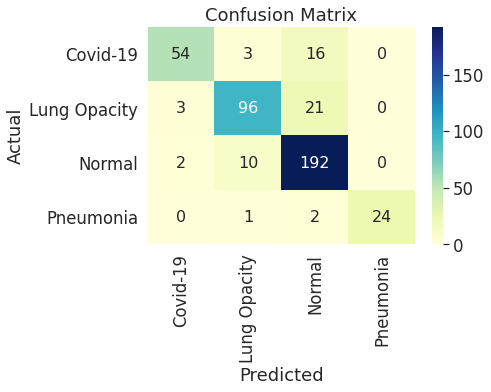

In [25]:
# Plotting Confusion Matrix
x = confusion_matrix(testY.argmax(axis=1),y_pred.argmax(axis=1))
Confusion_Matrix = pd.DataFrame(x,index=class_names, columns=class_names)

sns.set(font_scale=1.5, color_codes=True, palette='deep')
sns.heatmap(Confusion_Matrix, annot=True, annot_kws={'size':16}, fmt='d', cmap='YlGnBu')

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title('Confusion Matrix')
plt.show()

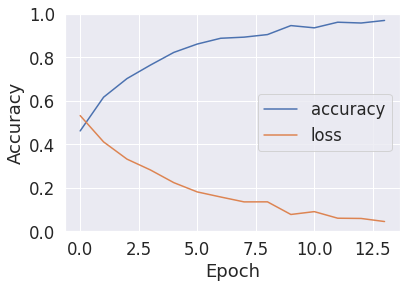

In [37]:
plt.plot(vgghist.history['acc'], label='accuracy')
plt.plot(vgghist.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='center right')


In [ ]:
model.save('vgg16_model.h5') 